In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [357]:
data_train = pd.read_csv('data/train.csv')

## Số liệu thống kê mô tả

In [430]:
features = ['s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9','s10',  's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21','ttf','label_bnc']
col_names = ['s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9','s10',  's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21']
data_train[features].shape

(20631, 23)

In [359]:
data_train[features].head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [360]:
data_train[features].describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
count,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000
mean,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862,0.150259
std,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990,0.357334
min,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,0.000000
25%,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000,0.000000
50%,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000,0.000000
75%,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000,0.000000
max,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000,1.000000


In [361]:
data_train[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   s1         20631 non-null  float64
 1   s2         20631 non-null  float64
 2   s3         20631 non-null  float64
 3   s4         20631 non-null  float64
 4   s5         20631 non-null  float64
 5   s6         20631 non-null  float64
 6   s7         20631 non-null  float64
 7   s8         20631 non-null  float64
 8   s9         20631 non-null  float64
 9   s10        20631 non-null  float64
 10  s11        20631 non-null  float64
 11  s12        20631 non-null  float64
 12  s13        20631 non-null  float64
 13  s14        20631 non-null  float64
 14  s15        20631 non-null  float64
 15  s16        20631 non-null  float64
 16  s17        20631 non-null  int64  
 17  s18        20631 non-null  int64  
 18  s19        20631 non-null  float64
 19  s20        20631 non-null  float64
 20  s21   

## Biểu diễn dữ liệu khuyết thiếu:

<AxesSubplot:>

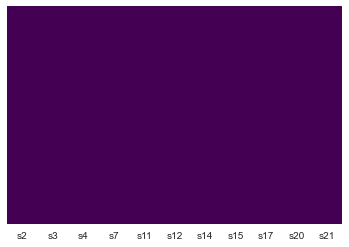

In [362]:
%matplotlib inline
sns.heatmap(data=data_train[features1].isnull(), yticklabels=False, cbar =False, cmap = 'viridis')

## xử lí giá trị ngoại lại

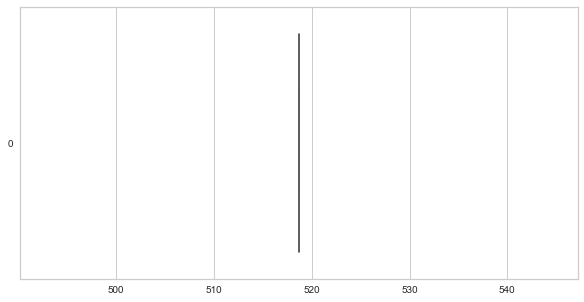

In [363]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s1'],orient="h",color = 'g') 
plt.show()

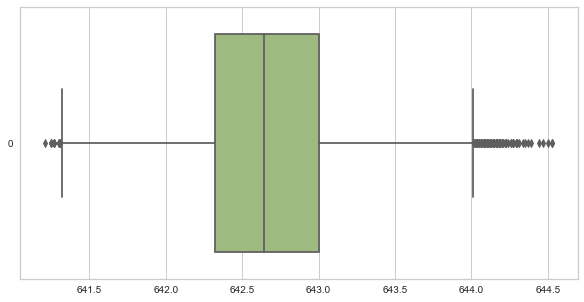

In [364]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s2'],orient="h",color = 'g') 
plt.show()

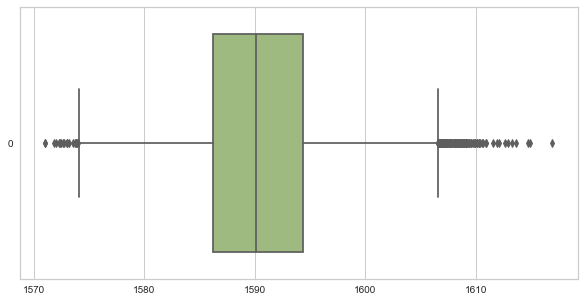

In [365]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s3'],orient="h",color = 'g') 
plt.show()

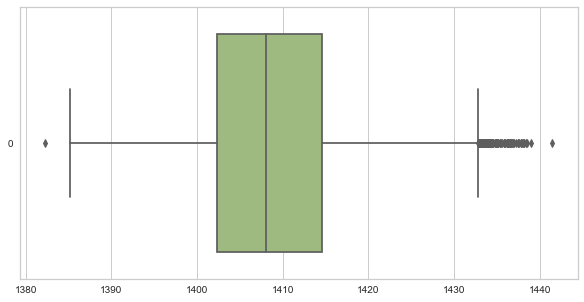

In [366]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s4'],orient="h",color = 'g') 
plt.show()

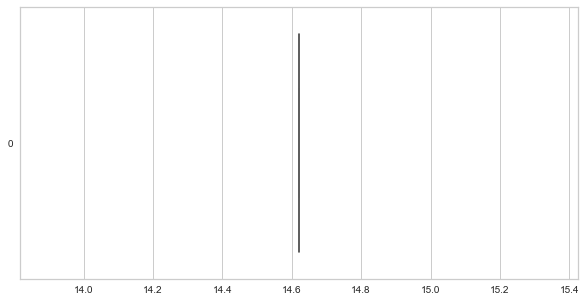

In [367]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s5'],orient="h",color = 'g') 
plt.show()

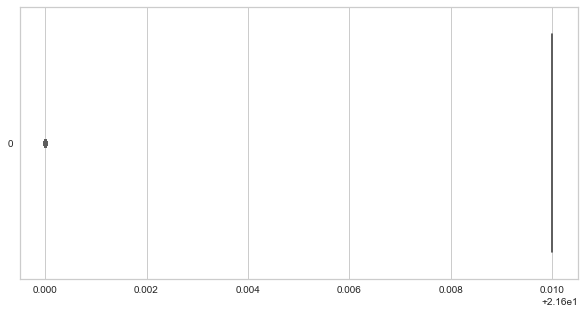

In [368]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s6'],orient="h",color = 'g') 
plt.show()

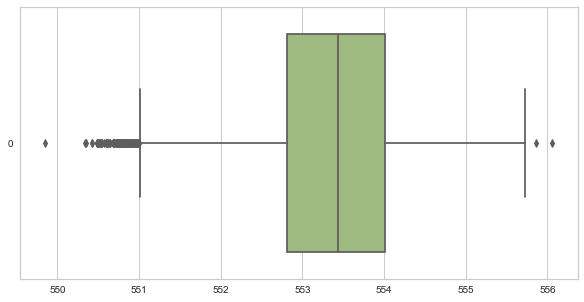

In [369]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s7'],orient="h",color = 'g') 
plt.show()

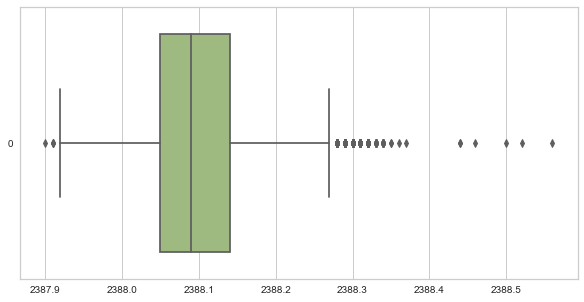

In [370]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s8'],orient="h",color = 'g') 
plt.show()

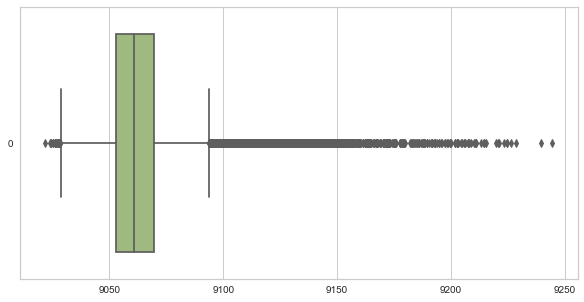

In [371]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s9'],orient="h",color = 'g') 
plt.show()

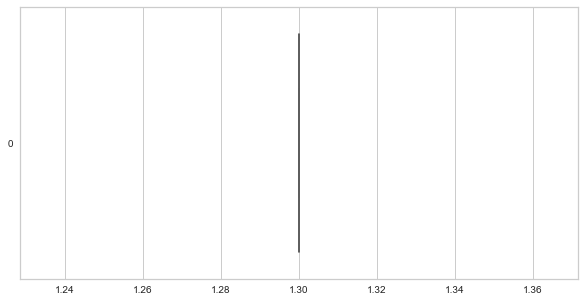

In [372]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s10'],orient="h",color = 'g') 
plt.show()

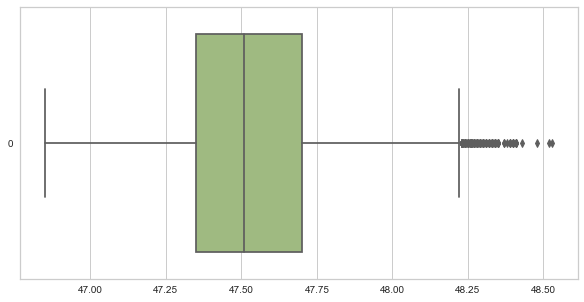

In [373]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s11'],orient="h",color = 'g') 
plt.show()

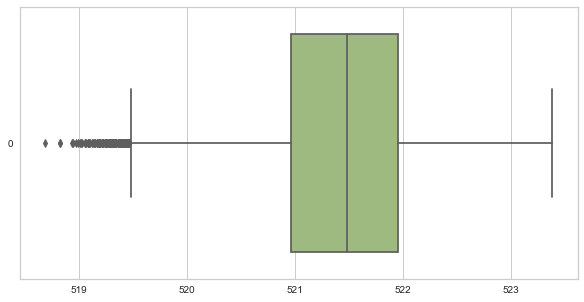

In [374]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s12'],orient="h",color = 'g') 
plt.show()

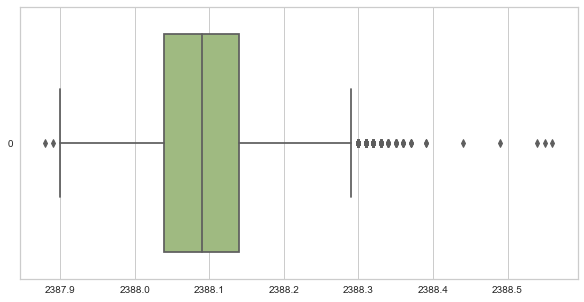

In [375]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s13'],orient="h",color = 'g') 
plt.show()

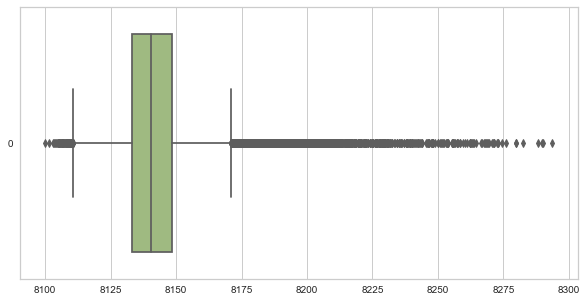

In [376]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s14'],orient="h",color = 'g') 
plt.show()

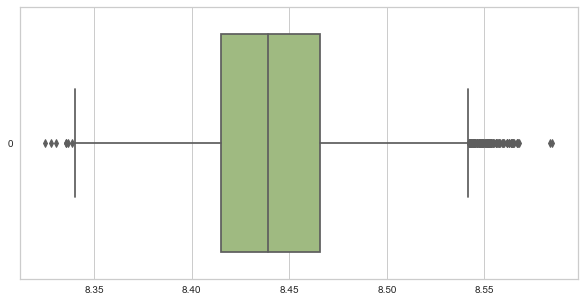

In [377]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s15'],orient="h",color = 'g') 
plt.show()

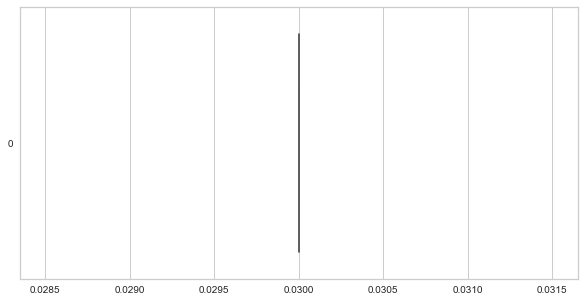

In [378]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s16'],orient="h",color = 'g') 
plt.show()

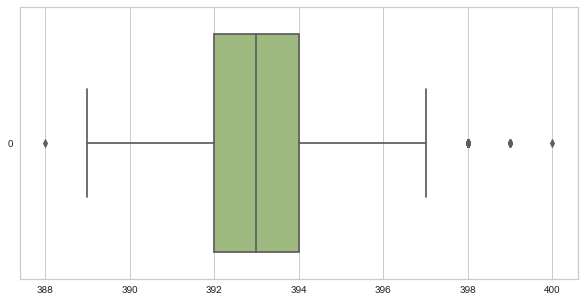

In [379]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s17'],orient="h",color = 'g') 
plt.show()

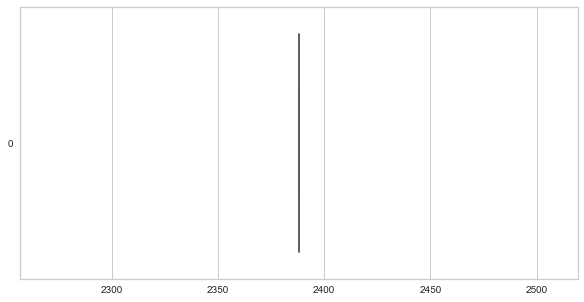

In [380]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s18'],orient="h",color = 'g') 
plt.show()

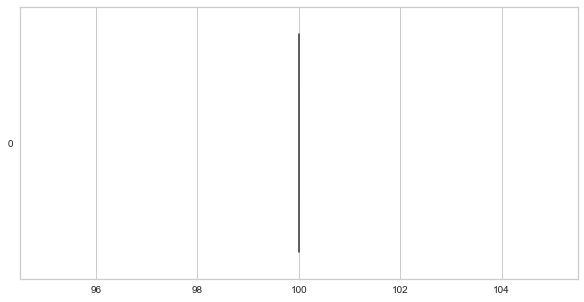

In [381]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s19'],orient="h",color = 'g') 
plt.show()

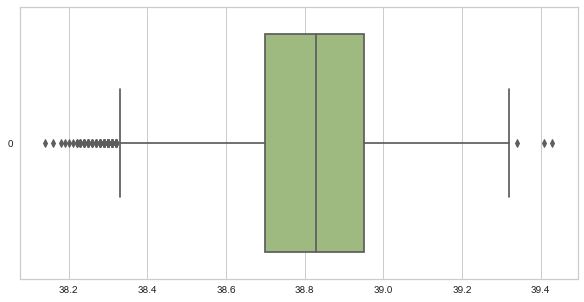

In [382]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s20'],orient="h",color = 'g') 
plt.show()

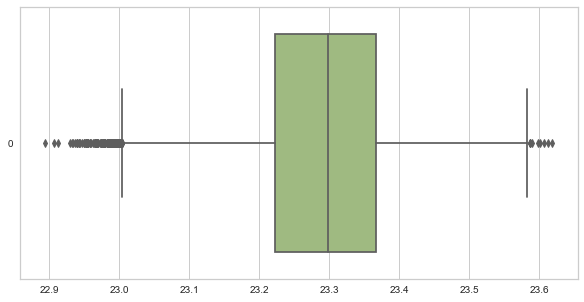

In [383]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s21'],orient="h",color = 'g') 
plt.show()

In [384]:
data = data_train[features]

In [385]:
factor = 3
upper_lim = data['s2'].mean () + data['s2'].std () * factor
lower_lim = data['s2'].mean () - data['s2'].std () * factor

data = data[(data['s2'] < upper_lim) & (data['s2'] > lower_lim)]

In [386]:
factor = 3
upper_lim = data['s3'].mean () + data['s3'].std () * factor
lower_lim = data['s3'].mean () - data['s3'].std () * factor

data = data[(data['s3'] < upper_lim) & (data['s3'] > lower_lim)]

In [387]:
factor = 3
upper_lim = data['s4'].mean () + data['s4'].std () * factor
lower_lim = data['s4'].mean () - data['s4'].std () * factor

data = data[(data['s4'] < upper_lim) & (data['s4'] > lower_lim)]

In [388]:
factor = 3
upper_lim = data['s6'].mean () + data['s6'].std () * factor
lower_lim = data['s6'].mean () - data['s6'].std () * factor

data = data[(data['s6'] < upper_lim) & (data['s6'] > lower_lim)]

In [389]:
factor = 3
upper_lim = data['s7'].mean () + data['s7'].std () * factor
lower_lim = data['s7'].mean () - data['s7'].std () * factor

data = data[(data['s7'] < upper_lim) & (data['s7'] > lower_lim)]

In [390]:
factor = 3
upper_lim = data['s8'].mean () + data['s8'].std () * factor
lower_lim = data['s8'].mean () - data['s8'].std () * factor

data = data[(data['s8'] < upper_lim) & (data['s8'] > lower_lim)]

In [391]:
factor = 3
upper_lim = data['s9'].mean () + data['s9'].std () * factor
lower_lim = data['s9'].mean () - data['s9'].std () * factor

data = data[(data['s9'] < upper_lim) & (data['s9'] > lower_lim)]

In [392]:
factor = 3
upper_lim = data['s11'].mean () + data['s11'].std () * factor
lower_lim = data['s11'].mean () - data['s11'].std () * factor

data = data[(data['s11'] < upper_lim) & (data['s11'] > lower_lim)]

In [393]:
factor = 3
upper_lim = data['s12'].mean () + data['s12'].std () * factor
lower_lim = data['s12'].mean () - data['s12'].std () * factor

data = data[(data['s12'] < upper_lim) & (data['s12'] > lower_lim)]

In [394]:
factor = 3
upper_lim = data['s13'].mean () + data['s13'].std () * factor
lower_lim = data['s13'].mean () - data['s13'].std () * factor

data = data[(data['s13'] < upper_lim) & (data['s13'] > lower_lim)]

In [395]:
factor = 3
upper_lim = data['s14'].mean () + data['s14'].std () * factor
lower_lim = data['s14'].mean () - data['s14'].std () * factor

data = data[(data['s14'] < upper_lim) & (data['s14'] > lower_lim)]

In [396]:
factor = 3
upper_lim = data['s15'].mean () + data['s15'].std () * factor
lower_lim = data['s15'].mean () - data['s15'].std () * factor

data = data[(data['s15'] < upper_lim) & (data['s15'] > lower_lim)]

In [397]:
factor = 3
upper_lim = data['s21'].mean () + data['s21'].std () * factor
lower_lim = data['s21'].mean () - data['s21'].std () * factor

data = data[(data['s21'] < upper_lim) & (data['s21'] > lower_lim)]

In [398]:
factor = 3
upper_lim = data['s17'].mean () + data['s17'].std () * factor
lower_lim = data['s17'].mean () - data['s17'].std () * factor

data = data[(data['s17'] < upper_lim) & (data['s17'] > lower_lim)]

In [399]:
factor = 3
upper_lim = data['s20'].mean () + data['s20'].std () * factor
lower_lim = data['s20'].mean () - data['s20'].std () * factor

data = data[(data['s20'] < upper_lim) & (data['s20'] > lower_lim)]

In [400]:
data

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,518.67,643.69,1599.85,1423.15,14.62,21.61,551.61,2388.18,9069.69,1.3,...,8139.78,8.4870,0.03,397,2388,100.0,38.65,23.0591,11,1
20620,518.67,643.12,1594.45,1426.04,14.62,21.61,551.06,2388.21,9064.74,1.3,...,8142.28,8.5162,0.03,395,2388,100.0,38.42,23.0603,10,1
20622,518.67,643.53,1601.23,1419.48,14.62,21.61,551.14,2388.17,9060.45,1.3,...,8143.46,8.4892,0.03,397,2388,100.0,38.56,23.0770,8,1
20623,518.67,643.09,1599.81,1428.93,14.62,21.61,552.04,2388.29,9067.57,1.3,...,8142.02,8.5424,0.03,397,2388,100.0,38.47,23.0230,7,1


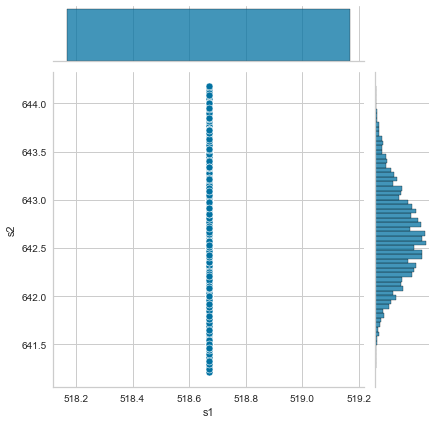

In [483]:
X=data[col_names]
y = data['ttf']
sns.jointplot(x='s1', y='s2', data=X)

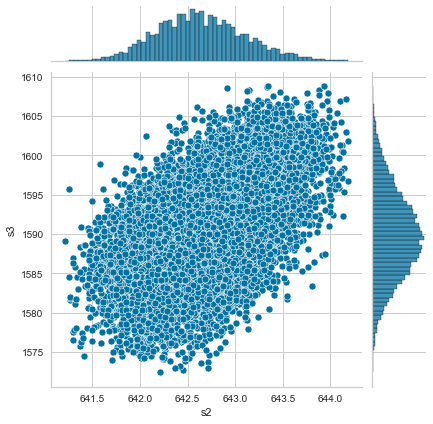

In [485]:
sns.jointplot(x='s2', y='s3', data=X) # from s1 to s21

<AxesSubplot:xlabel='s2', ylabel='s3'>

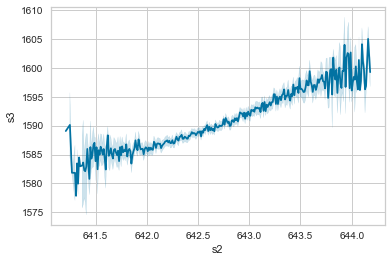

In [496]:
sns.lineplot(x='s2', y='s3', data=X) # from s1 to s21

<AxesSubplot:xlabel='s1', ylabel='s2'>

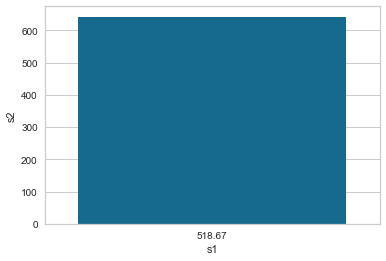

In [487]:
sns.barplot(x='s1', y='s2', data=X) # from s1 to s21

## xem phân phối

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s2', ylabel='Density'>

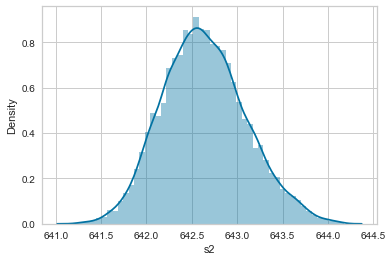

In [401]:
sns.distplot(a=data['s2'], kde=True)

## Tiêu chuẩn hóa

In [431]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data[col_names])

In [432]:
data_scaled.mean(axis=0)

array([ 0.00000000e+00,  1.74030356e-13, -4.07037380e-15,  7.34115601e-15,
       -1.00000000e+00, -1.00000000e+00,  5.21816490e-14, -3.89257782e-12,
        7.08362717e-14, -1.00000000e+00, -1.81854284e-14, -7.44721505e-14,
        6.31795033e-13, -7.14925403e-14, -1.71293640e-14, -1.00000000e+00,
        6.84329710e-15,  0.00000000e+00,  0.00000000e+00,  7.82845428e-15,
        3.94968073e-15])

In [433]:
data_scaled.std(axis=0)

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1.])

In [434]:
data_scaled.min(axis=0)

array([ 0.        , -3.09544054, -3.12325222, -3.17215445, -1.        ,
       -1.        , -3.30443845, -2.89652017, -2.72655196, -1.        ,
       -2.7176182 , -3.14739177, -3.00449388, -3.041582  , -3.01930817,
       -1.        , -2.88278346,  0.        ,  0.        , -2.99157346,
       -3.04800015])

In [435]:
data_scaled.max(axis=0)

array([ 0.        ,  3.34346074,  3.35353664,  3.35370016, -1.        ,
       -1.        ,  2.97502262,  3.10105008,  4.53731215, -1.        ,
        3.157702  ,  2.81366022,  3.07181004,  3.534335  ,  3.05932529,
       -1.        ,  2.79055668,  0.        ,  0.        ,  2.96164328,
        3.02447109])

In [436]:
df = pd.DataFrame(data_scaled, columns= [col_names])
df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,0.0,-1.772973,-0.046689,-0.919532,-1.0,-1.0,1.131737,-0.497492,-1.116524,-1.0,...,0.275787,-1.077861,-0.179095,-0.564983,-1.0,-0.755281,0.0,0.0,1.382218,1.209512
1,0.0,-1.057539,0.330324,-0.607724,-1.0,-1.0,0.382134,-0.797371,-1.269311,-1.0,...,1.190602,-0.336848,-0.764734,-0.204311,-1.0,-0.755281,0.0,0.0,1.017736,1.256075
2,0.0,-0.623943,-0.350788,-0.477600,-1.0,-1.0,1.008851,-0.197614,-0.630056,-1.0,...,1.397173,-0.929658,-0.621815,-0.614832,-1.0,-2.173616,0.0,0.0,0.714000,0.452351
3,0.0,-0.623943,-1.275536,-0.763628,-1.0,-1.0,1.242334,0.252204,-0.879416,-1.0,...,2.046396,-0.188646,-0.572533,-2.069247,-1.0,-0.755281,0.0,0.0,0.288770,0.752988
4,0.0,-0.580583,-1.264866,-0.229627,-1.0,-1.0,0.689348,-0.497492,-0.470783,-1.0,...,1.057806,-0.781456,-0.574997,-0.274686,-1.0,-0.046113,0.0,0.0,0.410265,1.061724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18834,0.0,2.281150,1.758347,1.848678,-1.0,-1.0,-2.247621,1.301779,0.577104,-1.0,...,-2.911311,2.182595,-0.083816,1.414312,-1.0,2.790557,0.0,0.0,-1.108413,-2.433566
18835,0.0,1.045402,0.798033,2.203451,-1.0,-1.0,-2.923493,1.751597,0.220361,-1.0,...,-2.881800,2.479000,0.121528,2.270540,-1.0,1.372222,0.0,0.0,-2.505597,-2.421419
18836,0.0,1.934274,2.003761,1.398153,-1.0,-1.0,-2.825184,1.151840,-0.088816,-1.0,...,-1.303007,1.737987,0.218450,1.478822,-1.0,2.790557,0.0,0.0,-1.655137,-2.252374
18837,0.0,0.980362,1.751234,2.558224,-1.0,-1.0,-1.719212,2.951111,0.424318,-1.0,...,-2.011251,1.441582,0.100172,3.038799,-1.0,2.790557,0.0,0.0,-2.201861,-2.798987


<AxesSubplot:xlabel='None', ylabel='None'>

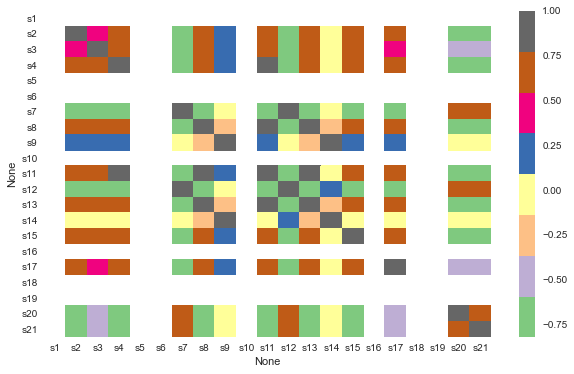

In [437]:
plt.figure(figsize=(10,6))
sns.heatmap(df[col_names].corr(),cmap= 'Accent')

In [438]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1= data_train[features].iloc[:,:-2]
vif_scores(df1)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Independent Features,VIF Scores
0,s1,0.000000e+00
1,s2,2.260884e+00
2,s3,2.282864e+00
3,s4,4.578003e+00
4,s5,1.659149e-25
5,s6,4.349514e-02
6,s7,4.237020e+00
7,s8,9.080392e-03
8,s9,1.648244e+01
9,s10,0.000000e+00


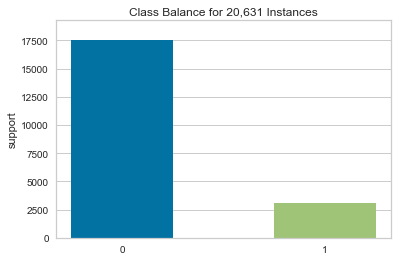

<AxesSubplot:title={'center':'Class Balance for 20,631 Instances'}, ylabel='support'>

In [442]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=['0','1'])
X = df[col_names]
y= data_train['label_bnc']
visualizer.fit(y1)        
visualizer.show() 


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


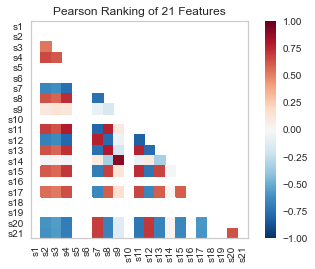

<AxesSubplot:title={'center':'Pearson Ranking of 21 Features'}>

In [444]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=col_names, algorithm='pearson')
visualizer.fit_transform(X=X.astype(float), y=data['ttf'])
visualizer.poof() 

In [488]:
features1 = ['s2', 's3', 's4',  's7',   's11', 's12',  's14', 's15',  
            's17',  's20', 's21']

## ứng dụng

In [489]:
data_test = pd.read_csv('data/test.csv')
data_scaled_test = scaler.fit_transform(data_test[features1])
df1 = pd.DataFrame(data_scaled_test, columns= [features1])

In [490]:
X_train =df[features1]
y_train = data['ttf']
X_test = df1
y_test = data_test['ttf']

In [491]:
regression = LinearRegression()
regression.fit(X_train, y_train)
# hệ số hồi quy
w1 = regression.coef_
w1

array([ -3.68370642,  -2.99021924,  -7.17575973,   6.11702225,
       -10.4598733 ,   7.79636447, -14.65160669,  -4.68640919,
        -3.22211498,   3.78152856,   4.7289184 ])

In [492]:
w0 =  regression.intercept_ 
w0

113.358670842401

In [493]:
y_pred = regression.predict(X_test)
y_pred

array([182.82466126, 141.31660349, 101.69747679, 113.56880827,
       135.92810919, 140.68812633, 149.4824517 , 114.3533158 ,
       135.34163916, 135.19368901, 119.95140822, 126.49373627,
       116.71536769, 135.21490039, 184.42503887, 154.64053578,
        92.85693236,  96.58053283, 139.81072811,  35.83555289,
       134.01504355, 164.48943077, 175.9987268 ,  37.33026319,
       156.79332694, 160.37633789, 150.94177135, 132.56148018,
       144.0596522 , 117.92679918,  23.32871209, 120.57008426,
       126.48728997,  21.21181309,  10.21193755,  49.43282159,
       100.06753102,  82.39099628, 173.40010223,  51.17747093,
       113.85059179,  54.85707911,  95.57485576, 141.18333501,
       102.22092954,  80.84338185, 144.46974274, 138.38107942,
        35.06462616, 145.83322275, 140.54528253,  57.66474001,
        49.39926362, 189.41612073, 160.8598234 ,  53.44517656,
       124.6279134 ,  89.66434822, 185.57374814, 135.76148277,
        66.21614641, 102.79178705, 102.60498081,  82.43

In [494]:
# R bình % của dự đoán
r_sq = regression.score(X_test, y_test)
r_sq 

-0.20870138100522295

In [495]:
df2 = pd.DataFrame({'thực': y_test, 'dự đoán': y_pred})
df2

,thực,dự đoán
0,112,182.824661
1,98,141.316603
2,69,101.697477
3,82,113.568808
4,91,135.928109
...,...,...
95,137,185.708007
96,82,121.741176
97,59,113.488316
98,117,180.440788
